In [73]:
from regressors import *
import pickle
import pandas as pd

In [105]:
n_stations = 200
n_timesteps = 100
k = 5

In [106]:
ensembleregression = EnsembleRegression(n_regressors=5,n_variables=3,eps=4, decision_boundary=0.7)
spatialcomparision = SpatialComparision()

In [107]:
data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise=0.1)
# data = RandomData(20,20,5, p_noise = 0.01)
validator1 = Validator(data,ensembleregression)
validator2 = Validator(data,spatialcomparision)

In [130]:
import time
RESULT = [] 
for n_timesteps in range(1000, 10000, 1000) : 
    print(n_stations, n_timesteps)
    ensembleregression = EnsembleRegression(n_regressors=5,n_variables=3,eps=4, decision_boundary=0.7)    
    data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise=0.01)
    # data = RandomData(20,20,5, p_noise = 0.01)
    validator1 = Validator(data,ensembleregression)
    validator2 = Validator(data,spatialcomparision)
    start = time.time()
    validator1.evaluate_validator()
    end = time.time() - start
    
    print(end)
    RESULT.append(end)

440 1000
1.4058334827423096
440 2000
2.7240757942199707
440 3000


KeyboardInterrupt: 

In [ ]:
import time
RESULT2 = [] 
for n_timesteps in range(1000, 10000, 1000) : 
    ensembleregression = EnsembleRegression(n_regressors=5,n_variables=3,eps=4, decision_boundary=0.7)
    spatialcomparision = SpatialComparision()
    data = Tempearture_DWD(n_stations, n_timesteps, k, p_noise=0.1)
    # data = RandomData(20,20,5, p_noise = 0.01)
    validator1 = Validator(data,ensembleregression)
    validator2 = Validator(data,spatialcomparision)
    start = time.time()
    validator1.evaluate_validator()
    RESULT2.append(time.time() - start)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(RESULT)
plt.plot(RESULT2)
plt.legend(['new','old'])

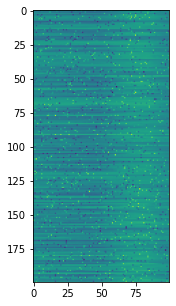

In [108]:
plt.figure(figsize=(5,5))
plt.imshow(data.ts_data)

In [88]:
validator1.evaluate_validator()

{'TP': 747,
 'TN': 8955,
 'FP': 45,
 'FN': 253,
 'n_stations': 100,
 'n_timestep': 100,
 'n_tsdata': 10000,
 'p_noises': 0.1,
 'precision': 0.9431818181818182,
 'recall': 0.747,
 'f1': 0.8337053571428572}

In [89]:
validator2.evaluate_validator()

{'TP': 499,
 'TN': 8764,
 'FP': 236,
 'FN': 501,
 'n_stations': 100,
 'n_timestep': 100,
 'n_tsdata': 10000,
 'p_noises': 0.1,
 'precision': 0.6789115646258503,
 'recall': 0.499,
 'f1': 0.5752161383285302}

In [90]:
%%timeit
validator1.evaluate_validator()

249 ms ± 82.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
%%timeit
validator1.evaluate_validator()

478 ms ± 76.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [103]:
%%timeit
validator1.evaluate_validator()

968 ms ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%%timeit
validator2.evaluate_validator()

330 ms ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [111]:
%%timeit
validator2.evaluate_validator()

647 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
%%timeit
validator2.evaluate_validator()

1.4 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


answer ['33_93']
new_idea []
exsiting_idea ['33_1', '33_3', '33_4', '33_5', '33_6', '33_7', '33_8', '33_11', '33_13', '33_14']


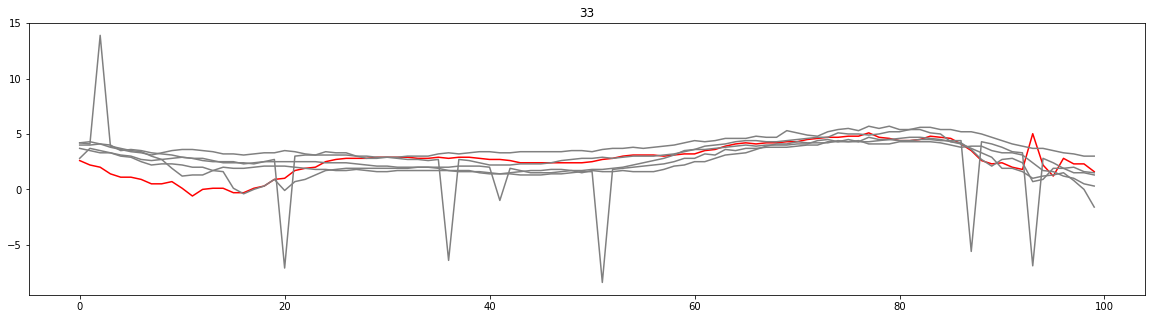

In [41]:
s = int(random.choice(data.lst_station_timestep).split('_')[0])

plt.figure(figsize=(20,5))
plt.plot(data.ts_data[s], color='red')
plt.plot(data.ts_data[data._neighbor[s]].T, color='grey')
plt.title(s)
print("answer", [x for x in data.lst_station_timestep if x.startswith(str(s) + '_')])
print("new_idea", validator1.validate(s))
print("exsiting_idea", validator2.validate(s))

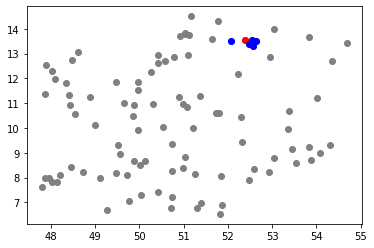

In [42]:

plt.scatter(data._metadata[:,1], data._metadata[:,2], color='grey')
plt.scatter(data._metadata[s,1], data._metadata[s,2], color='red')
plt.scatter(data._metadata[data._neighbor[s]][:,1], data._metadata[data._neighbor[s]][:,2], color='blue')

In [43]:
for d in data._metadata[data._neighbor[s]] : 
    
    print(validator1.spatial_reference(data._metadata[s], d)['distance'])

12997.24190093707
18342.558947854548
27886.917381648374
25337.710425511938
35578.42909795995


In [ ]:
d = data._metadata[:,1:]

In [ ]:
distance_matrix(d,d)[0]

In [ ]:
distance_matrix(d,d)[0][distance_matrix(d,d)[0].argsort()]

In [ ]:
data._metadata[data._neighbor[s]]

In [ ]:
df = pickle.load(open('data_dvd_reduced.p','rb'))
df_metadata = pickle.load(open('metadata.p', 'rb'))
metadata = df_metadata.values[:400]
neighbor = create_neighor_list(metadata[:,1:], k=5)
ts_rawdata = df.values[:400]
ts_preprocessed_data = preprocess_data(ts_rawdata)[:,5000:7000]

In [ ]:
ts_data, ANSWER, lst_noises = add_noise(ts_preprocessed_data, 0.10, 3, 10)


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ts_data)

In [ ]:
eps=4
n_regressors = 5
n_variables = 3


In [ ]:
RESULT = []
for i in range(100) : 
    result = evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']
    RESULT.append(result)
print(np.mean(RESULT))


In [ ]:
RESULT = []
for i in range(100) : 
    result = evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection2, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']
    RESULT.append(result)
print(np.mean(RESULT))


In [ ]:
RESULT = []
for i in range(100) : 
    result = evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection3, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']
    RESULT.append(result)
print(np.mean(RESULT))


In [ ]:
%%timeit
evaluator(ts_data, ANSWER, neighbor, classifier = spatialcomparision, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']

In [ ]:
%%timeit
evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']

In [ ]:
%%timeit
evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection2, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']

In [ ]:
%%timeit
evaluator(ts_data, ANSWER, neighbor, classifier = regression_based_outlier_detection3, n_regressors=n_regressors, n_variables=n_variables, eps=eps)['f1']

In [ ]:
STAT = evaluator(ts_data, ANSWER, neighbor, classifier = spatialcomparision)
STAT

In [ ]:
s = random.choice(list(set([k[0] for k,v in lst_noises.items()])))

plt.figure(figsize=(20,5))
plt.plot(ts_data[s], color='red')
plt.plot(ts_data[neighbor[s]].T , color='grey')
plt.title(s)

d = [(k,v) for k,v in sorted(lst_noises.items(), reverse=False, key=lambda x : x[0][0]) if k[0] == s]
print([(k,v) for k,v in sorted(d, reverse=False, key=lambda x : x[0][1])])
result1 = regression_based_outlier_detection(ts_data, neighbor, s, n_regressors, n_variables, eps=eps)
result2 = regression_based_outlier_detection2(ts_data, neighbor, s, n_regressors, n_variables, eps=eps)
result3 = regression_based_outlier_detection2(ts_data, neighbor, s, n_regressors, n_variables, eps=eps)
result4 = spatialcomparision(ts_data, neighbor, s)

print("classified by new idea", result1)
# print("classified by new idea2", result2)
# print("classified by new idea3", result3)
print("classified by old idea", result4)

In [ ]:
%%timeit
spatialcomparision(ts_data, neighbor, station=s)

In [ ]:
%%timeit
regression_based_outlier_detection(ts_data, neighbor, s, n_regressors=n_regressors, n_variables=n_variables, eps=3)


In [ ]:

n_regressors = 7
result = np.empty(len(ts_data[s]))
for i in range(n_regressors) : 
    idx = random.choices(neighbor[s],k=2)
    X = ts_data[idx]
    y = ts_data[s]
    reg = LinearRegression().fit(X.T, y)
    predict = reg.intercept_ + np.dot(X.T, reg.coef_)
    result += predict    
    print(idx, reg.score(X.T, y))
result = result / n_regressors


In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,10))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(ts_data[s], color='red')
ax1.plot(ts_data[neighbor[s]].T, color='grey')

ax2.plot(y, color='red')
ax2.plot(result, color='grey')


# ylim = [-1000,40]
# ax1.set_ylim(ylim)
# ax2.set_ylim(ylim)

diff = predict-y

ax3.plot(diff, color='red')


In [ ]:
def regression_based_outlier_detection2(ts_data, neighbor, station, n_regressors, n_variables, eps) :
    result = np.array([], dtype='int')
    coeffs = np.zeros((n_regressors, n_variables + 1))
    score = np.zeros(n_regressors)
    predict = np.zeros((n_regressors, ts_data.shape[1]))
    for i in range(n_regressors) : 
        idx = random.choices(neighbor[station],k=n_variables)
        y = ts_data[station] 
        X = ts_data[idx]
        reg = LinearRegression().fit(X.T, y)
        score[i] = reg.score(X.T, y)
        predict[i] = reg.intercept_ + np.dot(X.T, reg.coef_)
        
    
    print(score)
    idx = (-score).argsort()[:-1]
    score = score / score.sum()    
    return np.dot(predict[idx].T, score[idx])
    
    
    
    
    

In [ ]:
regression_based_outlier_detection2(ts_data, neighbor, s, n_regressors=10, n_variables=3, eps=2)


In [ ]:
predict

In [ ]:
score.sum()

In [ ]:
np.dot(predict.T, score)

# random test

In [ ]:
n_variables = 3
idx = random.choices(neighbor[s],k=n_variables)
print(idx)
y = ts_data[s]
X = ts_data[neighbor[s]]
reg = LinearRegression().fit(X.T, y)
predict = reg.intercept_ + np.dot(X.T, reg.coef_)
score = reg.score(X.T,y)
print(score)

In [ ]:
original = ts_rawdata[s]
predict = reg.intercept_ + np.dot(X.T, reg.coef_)
plt.plot(original)
plt.plot(predict)
plt.plot(original-predict)

In [ ]:
mean = np.mean(diff)
sd = np.std(diff)
result_stat = np.where((diff >= mean + 2* sd)  | (diff  <= mean - 2* sd ))[0]

In [ ]:
ANSWER.sort()
ANSWER

In [ ]:
result_stat